In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras

# Loading the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data/features_3_sec.csv')
df.head()

filename  length  chroma_stft_mean  ...  mfcc20_mean  mfcc20_var  label
0  blues.00000.0.wav   66149          0.335406  ...    -0.243027   43.771767  blues
1  blues.00000.1.wav   66149          0.343065  ...     5.784063   59.943081  blues
2  blues.00000.2.wav   66149          0.346815  ...     2.517375   33.105122  blues
3  blues.00000.3.wav   66149          0.363639  ...     3.630866   32.023678  blues
4  blues.00000.4.wav   66149          0.335579  ...     0.536961   29.146694  blues

[5 rows x 60 columns]

In [ ]:
df.shape

(9990, 60)

In [ ]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [ ]:
df=df.drop(labels='filename',axis=1)

# Understanding the Audio files

In [ ]:
audio_recording="/content/drive/MyDrive/Data/genres_original/country/country.00050.wav"
data,sr=librosa.load(audio_recording)
print(type(data),type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [ ]:
librosa.load(audio_recording,sr=45600)

(array([ 0.04582627,  0.06254332,  0.0583379 , ..., -0.13857861,
        -0.11823352, -0.05911855], dtype=float32), 45600)

In [ ]:
import IPython
IPython.display.Audio(data,rate=sr)

In [ ]:
audio_recording="/content/drive/MyDrive/Data/genres_original/classical/classical.00050.wav"
data1,sr1=librosa.load(audio_recording)
IPython.display.Audio(data1,rate=sr1)


# Visualizing the Audio files

# Raw Wave Files
It is a representation of sound as time on x-axis and amplitude on y-axis

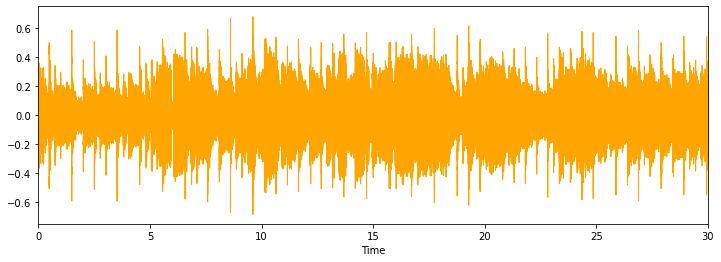

In [ ]:
plt.figure(figsize=(12,4))
librosa.display.waveplot(data,color="orange")
plt.show()

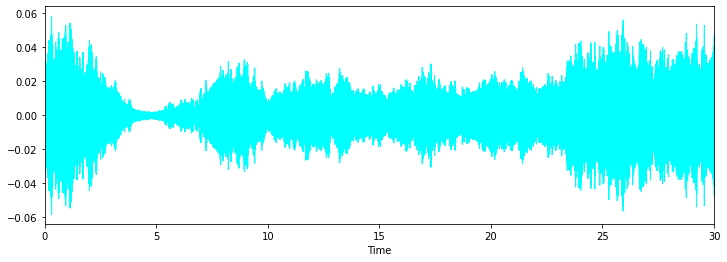

In [ ]:
plt.figure(figsize=(12,4))
librosa.display.waveplot(data1,color="cyan")
plt.show()

# Spectograms
It is a visual way of representing the signal loudness of a signal over time at various frequencies present in a particular waveform.
The horizontal axis represent the time of the clip and vertical axis represent the frequencies.

/usr/local/lib/python3.7/dist-packages/librosa/display.py:955: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  "Trying to display complex-valued input. " "Showing magnitude instead."


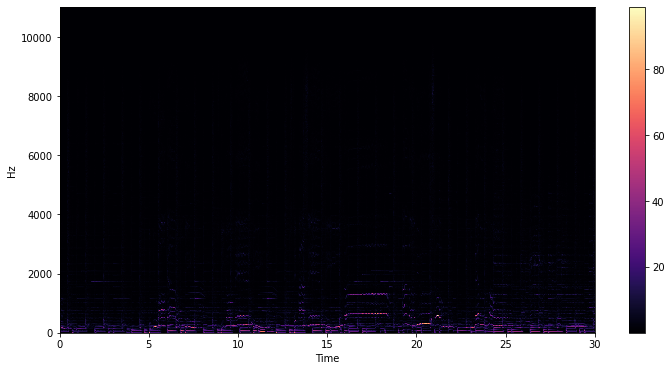

In [ ]:
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(12,6))
librosa.display.specshow(stft,sr=sr,x_axis="time",y_axis="hz")
plt.colorbar()

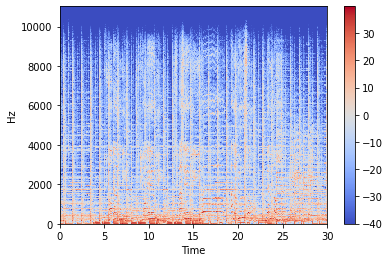

In [ ]:
librosa.display.specshow(stft_db,sr=sr,x_axis="time",y_axis="hz")
plt.colorbar()

# Chroma Feature

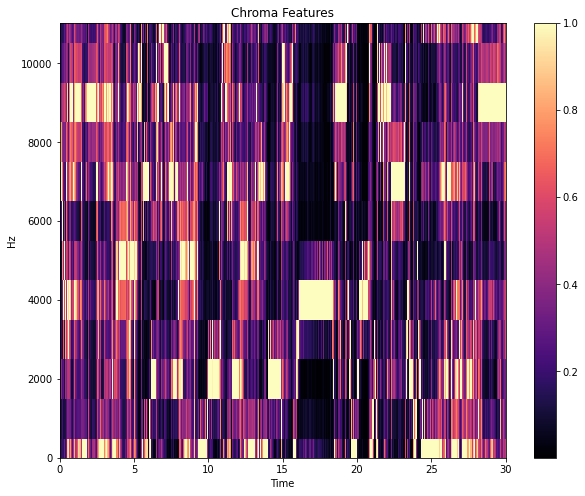

In [ ]:
import librosa.display as lplt
chroma=librosa.feature.chroma_stft(data,sr=sr)
plt.figure(figsize=(10,8))
lplt.specshow(chroma,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()
plt.title("Chroma Features")
plt.show()

# Zero Crossing Rate
It is a measure of the number of times in a given time interval/frame that the amplitude of the signal passes through the value of zero

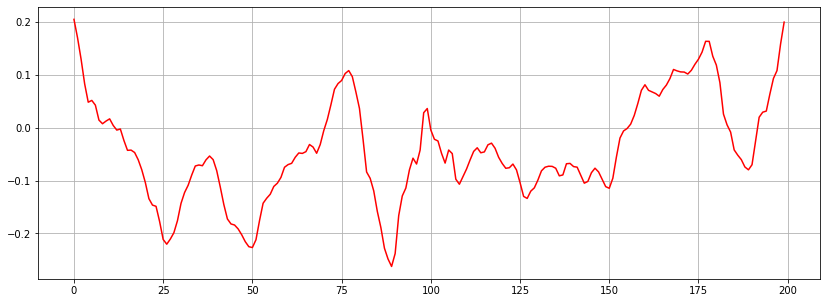

In [ ]:
start=1000
end=1200
plt.figure(figsize=(14,5))
plt.plot(data[start:end],color="red")
plt.grid()

In [ ]:
zero_crossrate=librosa.zero_crossings(data[start:end],pad=False)
print("the number of zero-crosing is:",sum(zero_crossrate))

the number of zero-crosing is: 8


# Preprocessing the data

# Feature Extraction

In [ ]:
class_list=df.iloc[:,-1]
convertor=LabelEncoder() # To convert categorical text data into model-understandable numerical data

In [ ]:
y=convertor.fit_transform(class_list) # It returns encoded labels 
y

array([0, 0, 0, ..., 9, 9, 9])

In [ ]:
print(df.iloc[:,:-1])

      length  chroma_stft_mean  ...  mfcc20_mean  mfcc20_var
0      66149          0.335406  ...    -0.243027   43.771767
1      66149          0.343065  ...     5.784063   59.943081
2      66149          0.346815  ...     2.517375   33.105122
3      66149          0.363639  ...     3.630866   32.023678
4      66149          0.335579  ...     0.536961   29.146694
...      ...               ...  ...          ...         ...
9985   66149          0.349126  ...     1.818823   38.966969
9986   66149          0.372564  ...     0.428857   18.697033
9987   66149          0.347481  ...    -0.299545   41.586990
9988   66149          0.387527  ...     0.675824   12.787750
9989   66149          0.369293  ...    -3.412534   31.727489

[9990 rows x 58 columns]


# Scaling Features

In [ ]:
from sklearn.preprocessing import StandardScaler
fit=StandardScaler()
x=fit.fit_transform(np.array(df.iloc[:,:-1]))

# Splitting data into training and testing sets

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

In [ ]:
len(y_train)

6693

In [ ]:
len(y_test)

3297

# BUILDING THE MODEL

In [ ]:
from keras.models import Sequential

def trainModel(model,epochs,optimizer):
  batch_size=128
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics='accuracy')
  return model.fit(x_train,y_train,validation_data=(x_test,y_test),
                   epochs=epochs,batch_size=batch_size
                   )

In [ ]:
model=keras.models.Sequential([
    keras.layers.Dense(512,activation='relu',input_shape=(x_train.shape[1],)),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.2),
   
    keras.layers.Dense(10,activation='softmax'),
])

print(model.summary())
model_history=trainModel(model=model,epochs=600,optimizer='adam')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               30208     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

Validation Acurracy 0.9314528107643127


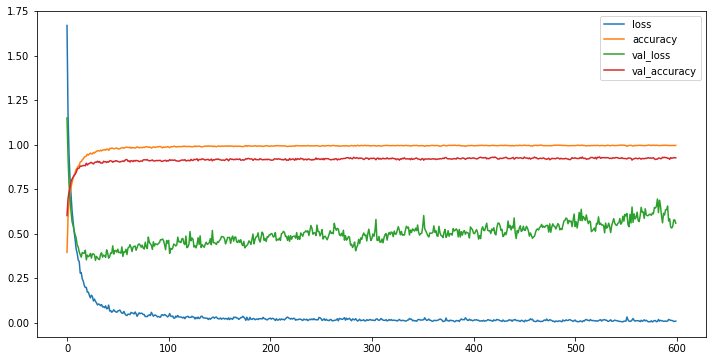

In [ ]:
def plotValidate(history):
  print("Validation Acurracy",max(history.history["val_accuracy"]))
  pd.DataFrame(history.history).plot(figsize=(12,6))
  plt.show()
plotValidate(model_history)

# Evaluating the model

In [ ]:
test_loss,test_acc=model.evaluate(x_test,y_test,batch_size=128)
print("The test Loss is:",test_loss)
print("The test Accuracy is:",test_acc*100)


26/26 [==============================] - 0s 2ms/step - loss: 0.5598 - accuracy: 0.9266
The test Loss is: 0.559761106967926
The test Accuracy is: 92.659991979599
